## **Objective **
### Social Media Tweet Exploratory Data Analysis (EDA) on Twitter Dataset



## Data Understanding
### Loading necessary packages

In [5]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/Tuesday/cleaned_fintech_data.csv 



In [6]:
os.listdir()

['.ipynb_checkpoints', 'cleaned_fintech_data.csv', 'EDA-Twitter.ipynb']

In [70]:
#To read csv file and create dataframe
tweets = pd.read_csv('cleaned_fintech_data.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [80]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

(array([402., 470., 394., 434., 398., 380., 384., 276., 270., 280., 254.,
        204., 214., 210., 210., 176., 176., 164., 166., 159.]),
 array([   0.  ,   74.05,  148.1 ,  222.15,  296.2 ,  370.25,  444.3 ,
         518.35,  592.4 ,  666.45,  740.5 ,  814.55,  888.6 ,  962.65,
        1036.7 , 1110.75, 1184.8 , 1258.85, 1332.9 , 1406.95, 1481.  ]),
 <BarContainer object of 20 artists>)

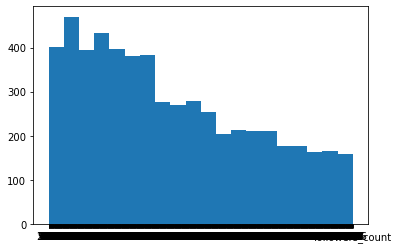

In [134]:
# Followers counts
plt.hist(tweets[tweets.followers_count != None].followers_count, bins = 20)

*Check if there are errors in the data*

In [115]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 17941
Columons having columns value:Index(['Unnamed: 0', 'clean_text', 'possibly_sensitive', 'hashtags', 'place',
       'place_coord_boundaries'],
      dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [92]:
tweets_df = pd.DataFrame(columns=['text',"lang"])

tweets_df['text'] =  tweets['clean_text'].to_list()
tweets_df['lang'] = tweets['lang']


In [93]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,text,lang
0,Giving forth life becoming burden Kenya This m...,en
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi
3,Today World Day Combat Restoring degraded land...,en
4,Hearing say 's confident vaccines delivered li...,en
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,en
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,in
5618,welkin moon giveaway bc finally money -u got t...,en
5619,Manam edi chesina Daaniki kuda elevation istad...,et


### uni-variate Analysis on Hashtags

In [12]:
re.findall?

In [23]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [71]:
# update Hashtag column with hashtags extracted from Orignal_text columon
tweets_df['hashtags'] = tweets['original_text'].apply(lambda x: find_hashtags(x))
print(tweets_df['hashtags'])

0                                                      []
1                                                      []
2                                                      []
3       [#Desertification, #Drought, #resilience, #bio...
4                         [#GregHunt, #Morrison, #auspol]
                              ...                        
5616                                             [#QandA]
5617                                                   []
5618                                                   []
5619                                                   []
5620                                                   []
Name: hashtags, Length: 5621, dtype: object


In [72]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [84]:
hashtags_list_df

,hashtags
3,"[#Desertification, #Drought, #resilience, #bio..."
4,"[#GregHunt, #Morrison, #auspol]"
5,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,..."
6,"[#Desertification, #Drought, #resilience, #bio..."
9,[#microgrids]
...,...
5611,[#QandA]
5613,"[#npcindia, #webinar, #wastemgmt, #carboncredi..."
5614,"[#mobilemoney, #Burundi, #youth, #innovation]"
5615,"[#CarbonSmart, #OurCleanFuture]"


In [85]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [86]:
flattened_hashtags_df

,hashtag
0,#Desertification
1,#Drought
2,#resilience
3,#biodiversity
4,#climatechange
...,...
4245,#youth
4246,#innovation
4247,#CarbonSmart
4248,#OurCleanFuture


### Analyzing data using language attribute

<AxesSubplot:title={'center':'Top 10 hashtags'}, xlabel='hashtag'>

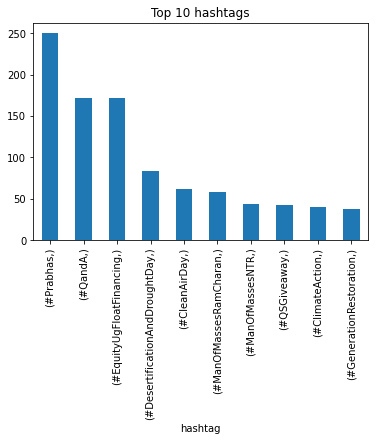

In [89]:
# To plot Top 20 Hashtags
flattened_hashtags_df.value_counts()[:10].plot(kind='bar', title = "Top 10 hashtags")

In [95]:
tweets_by_lang = tweets['lang'].value_counts()
print(tweets_by_lang)

en      3408
et      1152
in       572
tl       116
es        68
fi        50
fr        46
ht        42
it        36
hi        34
und       32
ja        28
pl        16
pt         6
de         4
tr         4
nl         4
no         2
lang       1
Name: lang, dtype: int64


<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

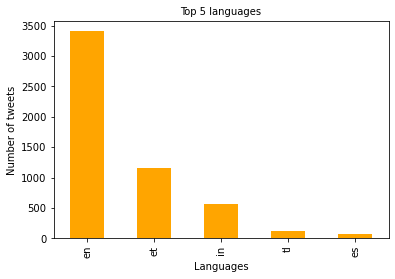

In [78]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [96]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets.loc[tweets['lang'] =="en"]

In [97]:
English_tweets

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00
5,5.0,Thu Jun 17 06:26:49 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Buy airtime across all networks from Mpesa eve...,Buy airtime across networks Mpesa even Fuliza ...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,...,OmarLali_,12376,3134,3167,NaN,NaN,"iamsoniah, F_M_Networks",NaN,Kenya,2021-06-17 06:26:49+00:00
6,6.0,Thu Jun 17 06:26:50 +0000 2021,"<a href=""https://help.twitter.com/en/using-twi...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,SustainTrends,299346,5930,159,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,NaN,2021-06-17 06:26:50+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,2802.0,Thu Jun 17 10:20:57 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Join @NPC_INDIA_GOV webinar on ""Carbon Credits...",Join webinar `` Carbon Credits Waste Managemen...,"Sentiment(polarity=-0.2, subjectivity=0.0)",-0.2,0.0,en,0,...,arunkjhaies,59391,2527,965,NaN,NaN,"NPC_INDIA_GOV, NPC_INDIA_GOV",NaN,New Delhi,2021-06-17 10:20:57+00:00
5615,2804.0,Thu Jun 17 10:20:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",In the latest episode of @LanzaTech’s #CarbonS...,In latest episode podcast Unilevers Peter Ter ...,"Sentiment(polarity=0.2791666666666667, subject...",0.2791666666666667,0.5145833333333334,en,0,...,ClimateCLG,10887,11086,3000,NaN,CarbonSmart,"Unilever, LanzaTech, TodaDogs",NaN,UK and Brussels,2021-06-17 10:20:59+00:00
5616,2805.0,Thu Jun 17 10:21:02 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,"Sentiment(polarity=0.13636363636363635, subjec...",0.13636363636363635,0.45454545454545453,en,0,...,TrixAnabella,65144,644,1064,NaN,NaN,davidbewart,NaN,NaN,2021-06-17 10:21:02+00:00
5618,2807.0,Thu Jun 17 10:21:08 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,"Sentiment(polarity=0.15416666666666667, subjec...",0.15416666666666667,0.5,en,0,...,acquitaine_,520,365,581,NaN,NaN,siilveon,NaN,deez nuts,2021-06-17 10:21:08+00:00


###Text Preprocessing

In [98]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


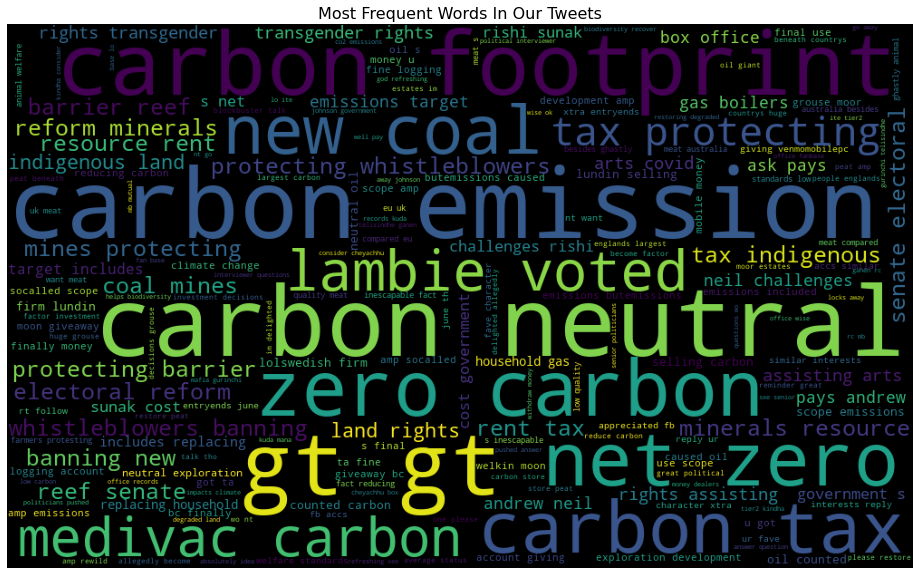

In [99]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [ ]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['giving',
  'forth',
  'life',
  'becoming',
  'burden',
  'kenya',
  'this',
  'mother',
  'gave',
  'birth',
  'babies',
  'hard',
  'time',
  'meeting',
  'nutritional',
  'needs',
  'coz',
  'baby',
  'formula',
  'expensiveturn',
  'bundles',
  'tears',
  'joy',
  'giving',
  'handmpesa',
  'douglas',
  'nyaoko'],
 ['today',
  'world',
  'day',
  'combat',
  'restoring',
  'degraded',
  'land',
  'brings',
  'jobs',
  'food',
  'security',
  'helps',
  'recover',
  'slows',
  'locking',
  'away',
  'carbon',
  'all',
  'critical',
  'lifting',
  'many',
  'poverty']]

In [ ]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ babies
1 ........ baby
2 ........ becoming
3 ........ birth
4 ........ bundles
5 ........ burden
6 ........ coz
7 ........ douglas
8 ........ expensiveturn
9 ........ formula
10 ........ forth
11 ........ gave
12 ........ giving
13 ........ handmpesa
14 ........ hard
15 ........ joy
16 ........ kenya
17 ........ life
18 ........ meeting
19 ........ mother
20 ........ needs
21 ........ nutritional
22 ........ nyaoko
23 ........ tears
24 ........ this
25 ........ time
26 ........ all
27 ........ away
28 ........ brings
29 ........ carbon
30 ........ combat
31 ........ critical
32 ........ day
33 ........ degraded
34 ........ food
35 ........ helps
36 ........ jobs
37 ........ land
38 ........ lifting
39 ........ locking
40 ........ many
41 ........ poverty
42 ........ recover
43 ........ restoring
44 ........ security
45 ........ slows
46 ........ today
47 ........ world
48 ........ confident
49 ........ delivered
50 ........ emissions
51 ........ g7
52 ........ hearing
53 ...

In [ ]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [ ]:
corpus_1[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)]]

### Modeling